# Your name: Kiejstut Bunikiewicz
## Assignment Name: CA04 - Ensemble Models

# Program Inititialization Section
## Enter your import packages here

In [ ]:
# import packages 

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import sklearn.metrics # this will give us the metrics to use later
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import svm
import matplotlib.pyplot as plt # this package and the packages after are used for graphing
import pydotplus
from google.colab import drive
!pip install xgboost #xgboost installer
import xgboost as xgb

#Mounting Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data File Reading Section / Data Source and Contents
## Write code to read in data from external sources here

In [ ]:
#read datasets
census_data = '/content/drive/My Drive/MSBA_Colab_2020/ML_Algorithms/CA03/Data/census_data.csv'
census_data = pd.read_csv(census_data)
census_data.head() # import successful

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [ ]:
#General Data Overview
census_data.describe
census_data.info
census_data.dtypes # data types look correct
census_data.shape # correct number of rows
census_data.count()

# Finding Missing values / NaNs
census_data.isnull().sum() # No null values/ NaN in dataset
census_data.tail()
census_data.head()


,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [ ]:
# Data Cleansing and Transformation
#changing the variables from string to Integer in a new census df so we can run Ensemble Models

new_cens = census_data.copy()

new_cens.replace(regex={r'[a]. ': 1, r'[b]. ': 2,r'[c]. ': 3, r'[d]. ': 4,r'[e]. ': 5}, inplace = True)
new_cens.head() # conversion successful
new_cens_test = new_cens[new_cens.flag == 'test']
new_cens_train = new_cens[new_cens.flag == 'train']

new_cens_train.head() # the data has been successfully split by flag

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,2,2,2,3,3,3,3,2,4,train,0
1,1,5,3,1,3,3,3,2,5,train,0
2,2,1,2,1,3,2,2,2,4,train,0
3,2,1,3,1,2,1,1,2,5,train,0
4,2,5,3,1,1,3,3,2,2,train,0


# 2. Finding the Optimal Value of a key Hyper-parameter

### Build Decision Tree Classifier Models:


In [ ]:
# Creating test and train for x and y, using new_cens data
X_train = new_cens_train[['hours_per_week_bin', 'occupation_bin','msr_bin','capital_gl_bin', 'race_sex_bin','education_bin', 'workclass_bin']]
X_train.head() # X_train is keeping selected explanatory variables with the train flag
X_train.shape
X_test = new_cens_test[['hours_per_week_bin', 'occupation_bin','msr_bin','capital_gl_bin', 'race_sex_bin','education_bin', 'workclass_bin']]
X_test.head() # X_test is keeping selected explanatory variables with the test flag
X_test.shape
y_train = new_cens_train.y
y_train.head() # y_train is keeping the target column (y) with the train flag
y_train.shape
y_test = new_cens_test.y #y_test is keeping the target column with the test flag
y_test.shape
y_test.head()

32561    0
32562    0
32563    1
32564    1
32565    0
Name: y, dtype: int64

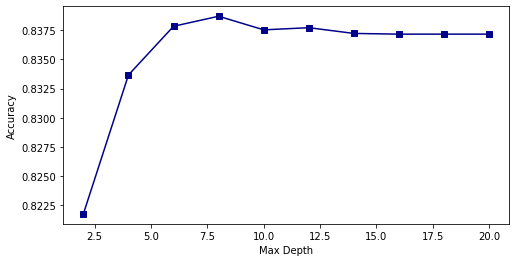

In [ ]:
# Finding Optimal Value for Max Depth

results = [] #empty list for appending accuracy values
max_depth_options = [2, 4, 6, 8, 10, 12 ,14, 16, 18, 20] # options of max depth we are testing for
for trees in max_depth_options:
    model = DecisionTreeClassifier(max_depth=trees, random_state= 101) #the model will cycle through options for max depth
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_test == y_pred) #accuracy calculation
    results.append(accuracy) #accuracy results are appended to list

plt.figure(figsize = (8,4))
pd.Series(results, max_depth_options).plot(color='darkblue', marker = 's')
plt.ylabel("Accuracy")
plt.xlabel("Max Depth")
plt.show() #Graphing the relationship between accuracy and max depth 

# the optimal value for max depth is ~8

# 3. Building a Random Forest Model

Accuracy 50 : 0.8398132792825993
AUC    50 : 0.723624124699608
Accuracy 100 : 0.8394447515508875
AUC    100 : 0.7230236857242685
Accuracy 150 : 0.8397518579939807
AUC    150 : 0.7228655467087199
Accuracy 200 : 0.8398747005712179
AUC    200 : 0.7230357609961816
Accuracy 250 : 0.8399361218598366
AUC    250 : 0.7234351545352525
Accuracy 300 : 0.8395061728395061
AUC    300 : 0.7228843025856136
Accuracy 350 : 0.8398132792825993
AUC    350 : 0.7231751441348365
Accuracy 400 : 0.8396290154167434
AUC    400 : 0.7226055363083039
Accuracy 450 : 0.8395675941281248
AUC    450 : 0.7225653272210503
Accuracy 500 : 0.839199066396413
AUC    500 : 0.7222342765845736


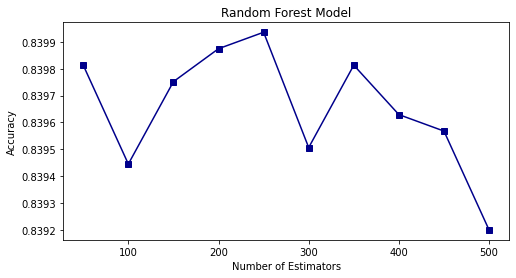

In [ ]:
# training the random forest model 
results = []
n_estimator_options = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500] # list of estimators we are testing for
for est in n_estimator_options:
    model = RandomForestClassifier(n_estimators=est, random_state= 101, max_depth = 8) #loop will cycle through the estimator list as a hyperparameter
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_test == y_pred) # calculating accuracy for each number of estimators
    results.append(accuracy)
    auc_score = roc_auc_score(y_test, y_pred) #calculating AUC for each number of estimators
    print("Accuracy", est, ":", accuracy)
    print("AUC   ", est, ":", auc_score) # printing AUC and Accuracy results

plt.figure(figsize = (8,4)) # plotting accuracy values compared to number of estimators
pd.Series(results, n_estimator_options).plot(color='darkblue', marker = 's')
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("Random Forest Model")
plt.show() # optimal value seems to be 250 estimators, based on accuracy rate

# 4. Building AdaBoost, Gradient Boost (classifier) and XGB Model

Accuracy 50 : 0.8412259689208279
AUC    50 : 0.7403530495863985
Accuracy 100 : 0.8411645476322093
AUC    100 : 0.7402230443861904
Accuracy 150 : 0.8411645476322093
AUC    150 : 0.7401332482732361
Accuracy 200 : 0.8411645476322093
AUC    200 : 0.7401332482732361
Accuracy 250 : 0.8411645476322093
AUC    250 : 0.7401332482732361
Accuracy 300 : 0.8411645476322093
AUC    300 : 0.7401332482732361
Accuracy 350 : 0.8411645476322093
AUC    350 : 0.7401332482732361
Accuracy 400 : 0.8411645476322093
AUC    400 : 0.7401332482732361
Accuracy 450 : 0.8411645476322093
AUC    450 : 0.7401332482732361
Accuracy 500 : 0.8411645476322093
AUC    500 : 0.7401332482732361


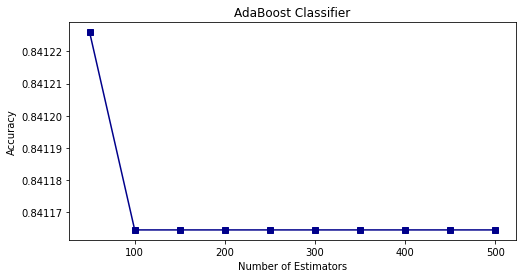

In [ ]:
#AdaBoost
# training the AdaBoost
results = []
n_estimator_options = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500] # list of AdaBoost number of estimators
for est in n_estimator_options:
    model = AdaBoostClassifier(n_estimators=est, random_state= 101) #loop will cycle through the estimator list as a hyperparameter
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_test == y_pred) # accuracy calculation
    results.append(accuracy)
    auc_score = roc_auc_score(y_test, y_pred) #AUC score calculation
    print("Accuracy", est, ":", accuracy)
    print("AUC   ", est, ":", auc_score) #printing AUC and Accuracy results

plt.figure(figsize = (8,4))
pd.Series(results, n_estimator_options).plot(color='darkblue', marker = 's')
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("AdaBoost Classifier")
plt.show() # In terms of accuracy and AUC, the optimal number of estimators is 50

Accuracy 50 : 0.8425158159818193
AUC    50 : 0.7438015276944009
Accuracy 100 : 0.8442356120631411
AUC    100 : 0.751392702270214
Accuracy 150 : 0.8444812972176157
AUC    150 : 0.7520025191840001
Accuracy 200 : 0.844419875928997
AUC    200 : 0.7528602712262894
Accuracy 250 : 0.844419875928997
AUC    250 : 0.7523214945485637
Accuracy 300 : 0.843744241754192
AUC    300 : 0.7516098062499098
Accuracy 350 : 0.8441741907745225
AUC    350 : 0.7517116776347772
Accuracy 400 : 0.844419875928997
AUC    400 : 0.7511541450801579
Accuracy 450 : 0.8444812972176157
AUC    450 : 0.7500270046990059
Accuracy 500 : 0.8442970333517598
AUC    500 : 0.7499961735501989


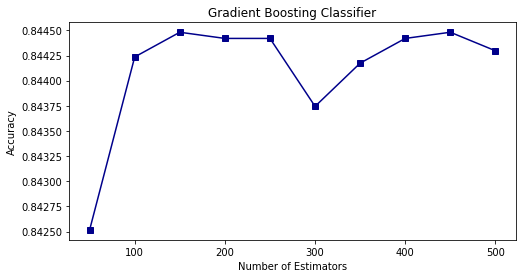

In [ ]:
#Gradient Boost (Classifier)
# training the Gradient Boost
results = [] # empty list for appending accuracy results
n_estimator_options = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500] # list for number of estimator options
for est in n_estimator_options:
    model = GradientBoostingClassifier(n_estimators=est, random_state= 101) # model loops through the options for number of estimators hyperparameter
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_test == y_pred) #accuracy calculation
    results.append(accuracy)
    auc_score = roc_auc_score(y_test, y_pred) #AUC calculation
    print("Accuracy", est, ":", accuracy)
    print("AUC   ", est, ":", auc_score) #printing AUC and Accuracy calculations for the different numbers of estimators

plt.figure(figsize = (8,4))
pd.Series(results, n_estimator_options).plot(color='darkblue', marker = 's')
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy") # plotting accuracy against number of estimators
plt.title("Gradient Boosting Classifier")
plt.show() # In terms of accuracy, 150 is the optimal number of estimators, in terms of AUC 200 is the optimal value

Accuracy 50 : 0.8415330753639212
AUC    50 : 0.7364234738267698
Accuracy 100 : 0.8423315521159634
AUC    100 : 0.7443094732233198
Accuracy 150 : 0.8442970333517598
AUC    150 : 0.750894134679742
Accuracy 200 : 0.8441741907745225
AUC    200 : 0.7515320854088686
Accuracy 250 : 0.8441127694859039
AUC    250 : 0.7513122840957064
Accuracy 300 : 0.8440513481972852
AUC    300 : 0.7512720750084527
Accuracy 350 : 0.843928505620048
AUC    350 : 0.7514610451728082
Accuracy 400 : 0.8443584546403784
AUC    400 : 0.7520118971224471
Accuracy 450 : 0.844419875928997
AUC    450 : 0.7516031256449294
Accuracy 500 : 0.844419875928997
AUC    500 : 0.751513329531975


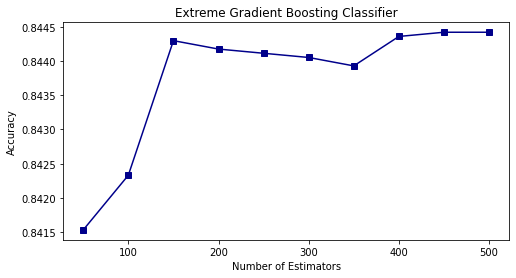

In [ ]:
# XGB Model
# determining optimal number of estimators for the XGB model
results = []
n_estimator_options = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500] #list to cycle through for optimal number of estimators
for est in n_estimator_options:
  model = xgb.XGBClassifier(random_state=101, learning_rate = 0.1, n_estimators = est) #loop uses number of estimators list for n_estimators hyperparameter
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = np.mean(y_test == y_pred) #accuracy calculation
  results.append(accuracy)
  auc_score = roc_auc_score(y_test, y_pred) # AUC calculations
  print("Accuracy", est, ":", accuracy) #Printing auc and accuracy for different numbers of estimators
  print("AUC   ", est, ":", auc_score)

plt.figure(figsize = (8,4))
pd.Series(results, n_estimator_options).plot(color='darkblue', marker = 's')
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy") #Graphing accuracy against number of classifiers
plt.title("Extreme Gradient Boosting Classifier")
plt.show() #In terms of accuracy, 450 or 500 estimators are tied for the highest score
#In terms of AUC, 400 estimators is the optimal estimator value

# 5. Compare Performance

In [50]:
# Keep all common hyper-parameters the same for the four models, run them again, and create a performance comparison table

#also print the values of the common hyper-parameters
results = [] #empty list to append accuracy results
aucsc = [] #empty list to append AUC results
methods = [RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, xgb.XGBClassifier] #list of methods for looping
for method in methods:
  model = method(random_state = 101, n_estimators = 50) #loop plugs the model in, with n_estimators held constant at 50
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = np.mean(y_test == y_pred) #accuracy calculation
  results.append(accuracy) #append result to accuracy list
  auc_score = roc_auc_score(y_test, y_pred) #AUC calculation
  aucsc.append(auc_score) # append result to AUC list
resultframe = pd.DataFrame( data= [results, aucsc], columns = ['Random Forest', 'AdaBoost', 'Gradient Boost', 'XGB'], index = ["Accuracy", "AUC"])
#Line above creates a DF for accuracy and AUC results, columns are the models used and index is the metric used
print(resultframe)

print("Common Hyperparameters", ":" , "random_state = 101, n_estimators = 50") #printing the common hyperparameters
#In terms of AUC, Random Forest is the best performing model with 50 estimators (0.740514)
#In terms of accuracy, Gradient Boost is the best model for 50 estimators (0.842516)

          Random Forest  AdaBoost  Gradient Boost       XGB
Accuracy       0.837356  0.841226        0.842516  0.841533
AUC            0.740514  0.740353        0.743802  0.736423
Common Hyperparameters : random_state = 101, n_estimators = 50
